# Elo rating za UFC

0. [Uvod](#def)
1. [Što je to <i> Elo rating</i>?](#uvod)
2. [Povijest - <i> Elo rating </i> i primjena u šahu](#povijest)
3. [<i> UFC </i> - osnovno](#UFC)
4. [<i> Web scraping </i>](#scraping)
5. [Implementacija <i> Elo rating</i> sustava](#implementacija)
6. [Zaključak](#zakljucak)
7. [Literatura](#literatura)

## 0. Uvod <a name="def"></a>

Osnovna ideja ovog eseja je proglasiti najboljeg borca mješovitih borilačkih svih vremena po <i> Elo ratingu </i>. U eseju će biti opisan <i> Elo rating </i>, najpoznatija <i> MMA </i> organizacija na svijetu te ćemo na temelju <i> Elo ratinga </i> odrediti najboljeg borca svih vremena.

## 1. Što je to Elo rating? <a name="uvod"></a>

<i> Elo rating </i> je metoda kojom se računa razina vještine igrača u igrama sume nula. Originalno je stvoren za šah, ali danas se koristi i za broje druge sportove. Današnja upotreba se nalazi u sportovima kao što su američki nogomet, košarka i bejzbol, raznim društevnim igrama kao što je <i> Scrabble </i> pa čak i u e-sportovima gdje je posebno uspješne primjenjen na <i> Counter Strike: Global Offensive </i>. 

Na početku karijere, turnira ili sezone (ovisno o sportu) svakom igraču dodijeljen je neki <i> Elo rating </i> kao neki pozitivni broj. Nakon svake odigrane igre taj broj se promijeni za oba igrača. <br>
Metoda nagrađuje pobjede protiv jačih suparnika i kažnjava poraze od slabijih suparnika. To znači da ukoliko je <i> Elo rating </i> prvog igrača veći od <i> Elo ratinga </i> drugog igrača u slučaju pobjede prvog igrača neće se dogoditi značajan porast u njegovom <i> Elo ratingu </i> dok bi se u slučaju pobjede drugog igrač ostvario značajan porast. <br>

## 2. Povijest Elo ratinga i primjena u šahu <a name="povijest"></a>

Vrhunski šahist Arpad Elo osmislio je ovaj sustav 1903. godine kao zamjenu za dotadašnji <i> Harkness sustav </i>. Velik broj sustava za procjenu kvalitete igrača subjektivni dojam <i> veličine </i> nekog natjecanja ili pobjede. Elo je osmislio sustav koji u obzir uzima samo kvalitetu igrača i njegovog protivnika kao što je navedeno u prethodnoj točki.

In [1]:
from IPython.display import Image

In [2]:
try:
    display(Image(filename="slike/ArpadElo.jpg"))
except Exception:
    display(Image(url="https://upload.wikimedia.org/"
                  "wikipedia/en/f/f0/ArpadElo.jpg"))

Od svih primjena ovog sustava i dalje je najkorišteniji upravo u šahu. <br>
Brojne šahovske organizacije kao što je Internacionalna šahovska federacija (FIDE) i online šahovski poslužitelji kao što je <i> chess24 </i> dan danas rangiraju svoje igrače Elo sustavom. <br>
Dolje su navedene dvije stranice gdje se može vidjeti <i> Elo rating </i> za FIDE i <i> chess24 </i>.

In [3]:
%%html
<iframe src="https://ratings.fide.com/top.phtml?list=men" width="1000" height="500"></iframe>

In [4]:
%%html
<iframe src="https://chess24.com/en/play/leaderboard" width="1000" height="500"></iframe>

## 3. UFC - osnovno <a name="UFC"></a>

<i> UFC </i> (Ultimate Fighting Championship) je američka organizacija koja se bavi promocijom <i> MMA </i> (Mixed Martial Arts) borbi. Organizacija je osnovana 1993. godine s ciljem otkrivanja najkorisnije borilačke vještine. <br>
Prvi <i> UFC </i> događaji održavali su se u formatu turnira. U prvih godinu dana postojanja organizacije održala su se samo četiri događaja dok se u današnje vrijeme održava preko 40 godišnje što ukazuje na velik rast popularnosti ovog sporta u svijetu.

<i> UFC </i> događaj sastoji se od nekoliko borbi između dva borca. Borba je očito igra sume nula. Mogući rezultati jedne borbe su sljedeći:
- pobjeda nokautom ili tehničkim nokautom
- pojeda predajom (često uzrokovano gušenjem ili polugom na nekom zglobu)
- pobjeda sudačkom odlukom
- pobjeda diskvalifikacijom
- izjednačenje sudačkom odlukom

Postoje još neke mogućnosti kao što je proglašenje borbe neodržanom (često zbog slučajne ozljede borca), ali takve ćemo odluke smatrati izjednačenim kako bi mogli ostati u kontekstu igre sume nula.

Službeno ne postoji objektivni ranking boraca. Takvu stvar teško je napraviti zbog same prirode sporta. Često će se dogoditi da ne pobjedi najbolji borac. Jako je teško procijeniti i težinu određene borbe te je zbog relativnog malog broja borbi koje borci odrade teško doći do pravilne distribucije (jako malo boraca skupi 30 borbi u <i> UFC-u </i>).

Borci se službeno rangiraju po subjektivnom mišljenju novinara po težinskim kategorijama. Postoji i takozvana <i> pound for pound </i> ljestvica koja rangira kvalitetu borca relativno s njegovom težinom. <br>
Jednostavno tumačenje te tablice govori da bi borac koji se nalazi više na tablici porazio borca ispod sebe da imaju jednako kilograma. <br>
Za više o ovom rangiranju kliknite <a href = "https://www.ufc.com/rankings"> ovdje </a>.

#### Zašto baš UFC?
Ideja eseja je odrediti najboljeg borca svih vremena. Ova organizacija je odabrana zato što su njeni borci već dugi niz godina smatrani najboljim svjetskim borcima. <br>
Mana ovog pristupa mogla bi biti propuštanje nekih velikih imena iz drugih organizacija. <br>
Ipak druge organizacije nisu uključene u ovaj esej jer je smatrano da bi zbog kvalitete boraca dobili neočekivane pa čak i rezultate (<i> Elo rating </i> nagrađuje pobjede što bi moglo raditi probleme s obzirom da bi puno pobjeda dolazilo protiv protivnika manje kvalitete).

## 4. Web scraping <a name="scraping"></a>

Zbog nedostatka službene baze svih borbi od početka organizacije potrebno se okrenuti alternativnim načinima pronalaska kvalitetne baze podataka. <br>
Za ovaj esej korištena je baza dobijanja <i> web scrapeanjem </i> sa stranice <a href = "http://ufcstats.com/statistics/events/completed"> ufcstats.com </a>. Kod za ovaj proces preuzet je za sljedećeg <a href = "https://github.com/WarrierRajeev/UFC-Predictions"> github repozitorija</a>.

<i> Web scraping </i> je proces sakupljanja i parsiranja podataka sa interneta. <br>
Sljedeći odsječak bi trebao instalirati potrebne biblioteke potrebne za <i> scraping </i> sa <i> Pythonom </i>.

In [5]:
import sys
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install requests

Biblioteka <i> requests </i> omogućuje jednostavno slanje http zahtjeva dok biblioteka <i> beautifulsoup4 </i> omogućuje jednostavno parsiranje web stranica.

Slijedi primjer jednostavne <i> scraping </i> funkcije.

In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
def web_scrape(url, identifier, container=None):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find_all(container, class_=identifier)
    for result in results:
        print(result.text.strip())

Sljedeća funkcija se jednostavno koristi. Potrebno je zadati url stranice koju želimo <i> scrapeati </i>. <br>
Potrebno je zadati <i> identifier </i> odsječka kojeg tražimo i <i> container </i> u kojem se on nalazi. Posljednji argument nije obavezan.

Navigacijom na stranicu čije podatke želimo dovući i inspekcijom stranice klikom na ctrl + shift + i (barem u <i>Chrome-u</i> na operativnom sustavu <i> Windows 10</i>) uz osnovno poznavanje <i> HTML-a </i> lako nalazimo željene podatke.

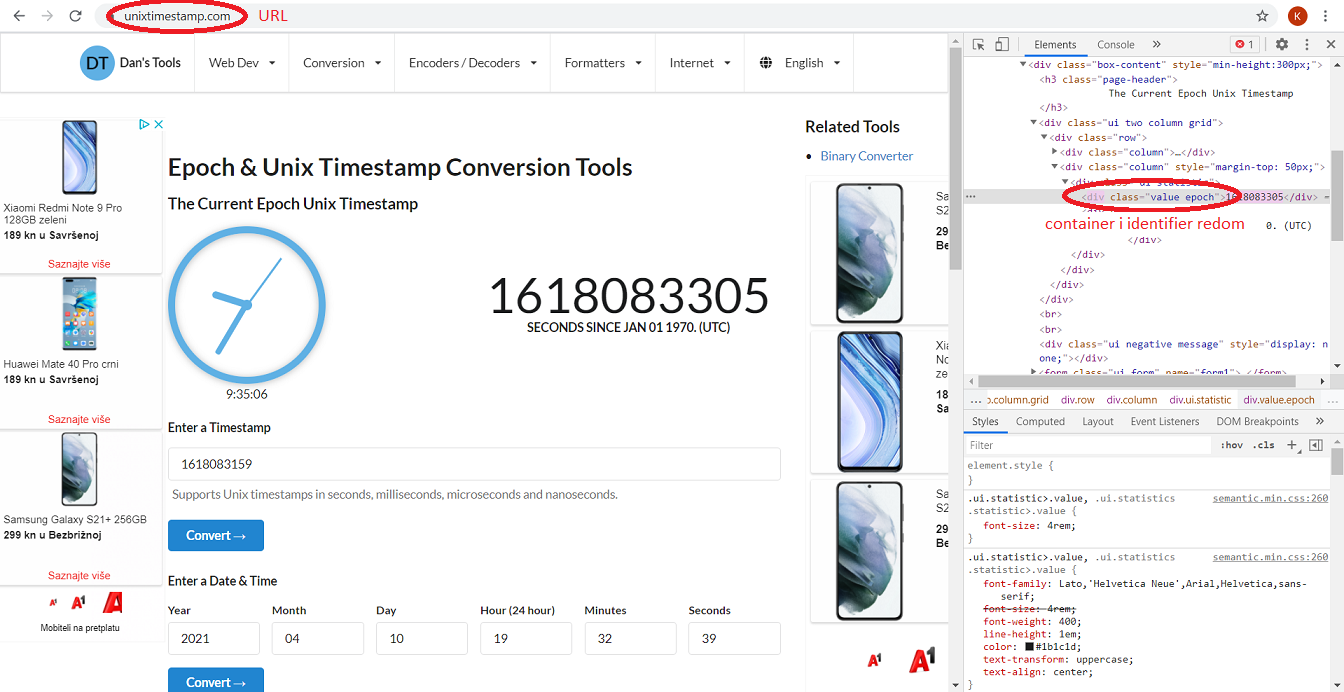

In [8]:
display(Image(filename="slike/epoch_value.png"))

Jednostavan primjer poziva prethodne funkcije, rezultat je broj sekundi od 1.1.1970. (UTC).

In [9]:
web_scrape("https://www.unixtimestamp.com/", "value epoch", "div")

1618100583


Malo kompliciraniji poziv funkcije koji vraća naslove obavijesti sa stranice <i> PMF </i> matematičkog odsjeka.

In [10]:
web_scrape("http://www.pmf.unizg.hr/math", ["news_article_title",
                                            "news_short_title"], "div")

University Trading Tournament - POZIV
Natječaji za stipendije francuske vlade 2021/2022
BEST Zagreb - Obavijest o primanju novih članova i uvodnom sastanku
Udruga CISEx, u suradnji s udrugom CroAI, pokreće hrvatsku AI ligu
Natječaj za dodjelu Rektorove nagrade za ak. god. 2020./21.
Važna obavijest studentima (28.01.)
PMF priprema prvi studij u Hrvatskoj iz biomedicinske matematike


Ova tehnika jako je moćna i korisna. Danas se koristi u raznim aspektima <i> data sciencea </i>, poslovne inteligencije i sličnog. <br>
S obzirom na kompliciranu tematiku koja nije usko vezana uz ovaj esej nećemo proučavati složenije primjere.

## 5. Implementacija Elo rating sustava <a name="implementacija"></a>

In [11]:
import pandas as pd
import numpy as np
import operator

Učitavanje podataka o borcima <i> pandas </i> bibliotekom te dodavanje stupca <i> Elo rating </i> inicijaliziranog na $1500$.

In [12]:
fighter_details = pd.read_csv("fighter_details.csv",
                              encoding='utf-8')[['fighter_name', 'Weight']]

In [13]:
fighter_details = fighter_details.set_index('fighter_name')
fighter_details.insert(1, "Elo rating", 1500)

In [14]:
fighter_details.head()

,Weight,Elo rating
fighter_name,,
Ricardo Abreu,185 lbs.,1500
Papy Abedi,185 lbs.,1500
Klidson Abreu,205 lbs.,1500
Shamil Abdurakhimov,235 lbs.,1500
Daniel Acacio,180 lbs.,1500


Učitavanje podataka o svim borbama. Podaci ukljčuju metodu pobjede, datum, tip borbe i pobjednika.

In [15]:
total_fight_data = pd.read_csv("total_fight_data.csv", delimiter=";",
                               encoding='utf-8')[["R_fighter", "B_fighter",
                                                  "win_by", "date",
                                                  "Fight_type", "Winner"]]

In [16]:
total_fight_data.head()

,R_fighter,B_fighter,win_by,date,Fight_type,Winner
0,Sean O'Malley,Thomas Almeida,KO/TKO,"March 27, 2021",Bantamweight Bout,Sean O'Malley
1,Jared Gooden,Abubakar Nurmagomedov,Decision - Unanimous,"March 27, 2021",Welterweight Bout,Abubakar Nurmagomedov
2,Alonzo Menifield,Fabio Cherant,Submission,"March 27, 2021",Light Heavyweight Bout,Alonzo Menifield
3,Stipe Miocic,Francis Ngannou,KO/TKO,"March 27, 2021",UFC Heavyweight Title Bout,Francis Ngannou
4,Shane Young,Omar Morales,Decision - Unanimous,"March 27, 2021",Featherweight Bout,Omar Morales


Korištenjem funkcije <i> panadas.to_datetime </i> promijenimo format datuma tako da možemo sortirati po datumu. Za <i> Elo rating </i> je važno da gledamo borbe po redu kako bi dobili što realniju sliku.

In [17]:
total_fight_data["date"] = pd.to_datetime(total_fight_data["date"],
                                          format='%B %d, %Y')

In [18]:
total_fight_data = total_fight_data.sort_values(by=["date"])

Sortiranje boraca po broju pobjeda u organizaciji. Biti će zanimljivo proučiti korelaciju broja pobjeda i <i>Elo ratinga </i>.

In [19]:
most_wins = total_fight_data[["Winner"]]
most_wins.insert(1, "Win count", 0)
most_wins = most_wins.groupby("Winner").count().sort_values("Win count",
                                                            ascending=False)
most_wins.head()

,Win count
Winner,
Donald Cerrone,23
Demian Maia,22
Jim Miller,21
Jon Jones,20
Michael Bisping,20


#### Potrebne funkcije i strukture za Elo

Deklaracija klase Elo koja će se postupno popunjavati definiranjem formula potrebnih za računanje <i> Elo ratinga </i>.

Za početak uvedimo oznake:
- $k$ je maksimalan broj bodova koji borac može dobiti ili izgubiti jednom borbom
- $\beta$ faktor s kojim skaliramo očekivanje pobjede borca,intuitivno što je $\beta$ manji pridana je veća vrijednost razlici između rankinga protivnika
- $title\_scale$ parametar nije vezan za općeniti <i> Elo rating </i>, motivacija će biti objašnjena kasnije
- <i> _win </i>, <i> _lose </i> i <i> _draw </i> su konstante koje označavaju rezultat borbe

In [20]:
class Elo:
    _win = 1
    _draw = 0.5
    _lose = 0

    def __init__(self, K=32, beta=400, title_scale=1):
        self._K = K
        self._beta = beta
        self._title_scale = title_scale

    def _real_result(self, red, blue, winner):
        if (red == winner):
            return self._win, self._lose

        elif (blue == winner):
            return self._lose, self._win

        else:
            return self._draw, self._draw

Nadalje se koriste sljedeće oznake:
- $R_A$ je <i> Elo rating </i> borca $A$
- $S_A$ je stvarni rezultat koji je postigao borac $A$ u borbi (pobjeda, poraz ili izjednačen rezultat)
- $E_A$ je očekivani rezultat borca $A$ u borbi
- $R_A'$ je novi <i> Elo rating </i> borca $A$

Formula za očekivanje da će borac $A$ pobjediti borca $B$ dana je formulom: <br> 
- $ E_A = \frac{1}{1 + 10^{\frac{R_B - R_A}{\beta}}} $

In [21]:
def _expectation(self, a, b):
    return 1 / (1 + 10**((b - a) / self._beta))


def _expected_result(self, red_elo, blue_elo):
    return self._expectation(red_elo, blue_elo), self._expectation(blue_elo,
                                                                   red_elo)


Elo._expectation = _expectation
Elo._expected_result = _expected_result

<i> Elo rating </i> nakon borbe računa se po formuli:
- $ R_A' = R_A + k\cdot (S_A - E_A)$

Faktor $title\_scale$ uveden je u ovom eseju kako bi veću važnost bila pridana borbama za titulu. Takve borbe su u pravilu kompetitivnije i protiv najboljih mogućih protivnika. <br>
U slučaju borbe za titulu faktor $k$ se skalira sa $title\_scale$. <br>
Ovako nešto nije potrebno u šahu s obzirom na veliki broj partija koje igrači igraju, ali zanimljiva je informacija u danom problemu.

In [22]:
def _new_elo_calc(self, a, res, expectation, is_title):
    K = self._K
    if is_title:
        K = self._title_scale * K
    return a + K * (res - expectation)


def ufc_elo(self, red, blue, winner, is_title=False):
    real_red, real_blue = self._real_result(red.name, blue.name, winner)

    expectation_red, expectation_blue = \
                                    self._expected_result(red["Elo rating"],
                                                          blue["Elo rating"])

    red = red.replace(red["Elo rating"],
                      self._new_elo_calc(red["Elo rating"], real_red,
                                         expectation_red, is_title))
    blue = blue.replace(blue["Elo rating"],
                        self._new_elo_calc(blue["Elo rating"], real_blue,
                                           expectation_blue, is_title))

    return red, blue


Elo._new_elo_calc = _new_elo_calc
Elo.ufc_elo = ufc_elo

Slijedi funkcija koja prolazi kroz sve borbe <i> UFC-a </i> te računa <i> Elo rating </i> za svakog borca. <br>
Na kraju se ispisuje deset najboljih boraca.

In [23]:
def test_elo(fighter_details, K, beta, title_scale=1):
    elo = Elo(K, beta, title_scale)

    for (_, row) in total_fight_data.iterrows():
        red = row['R_fighter']
        blue = row['B_fighter']
        winner = row['Winner']

        red_fighter_data = fighter_details.loc[red]
        blue_fighter_data = fighter_details.loc[blue]

        (fighter_details.loc[red], fighter_details.loc[blue]) = \
            elo.ufc_elo(red_fighter_data, blue_fighter_data, winner,
                        'Title' in row['Fight_type'])

    print(fighter_details.sort_values(by=['Elo rating'],
            ascending=False).head(10))

Kratka napomena: američka šahovska federacija USCF računa $k$ faktor ovisno o trenutnom rangu protivnika. Što je protivnik bolje rangiran to mu je teže napredovati. To ovdje nema smisla raditi s obzirom na prirodu sporta, ali zanimljivo je promatrati rezultate varijacijama parametara $k$ i $\beta$.

Funkcija se poziva sa parametrima $ k = 32 $ i $ \beta = 400 $.

In [24]:
fdets_copy = fighter_details.copy()
test_elo(fdets_copy, 32, 400)

                       Weight   Elo rating
fighter_name                              
Jon Jones            205 lbs.  1750.865399
Georges St-Pierre    185 lbs.  1746.811470
Kamaru Usman         170 lbs.  1698.754105
Khabib Nurmagomedov  155 lbs.  1692.617958
Dustin Poirier       155 lbs.  1679.520922
Amanda Nunes         145 lbs.  1675.402825
Demetrious Johnson   125 lbs.  1667.645159
Max Holloway         145 lbs.  1660.156839
Charles Oliveira     155 lbs.  1657.985935
Tony Ferguson        155 lbs.  1657.838133


Smanjivanjem faktora $\beta$ odnosno povećanjem vrednovanja kvalitete protivnika dobija se sljedeća lista:

In [25]:
fdets_copy = fighter_details.copy()
test_elo(fdets_copy, 32, 200)

                         Weight   Elo rating
fighter_name                                
Jon Jones              205 lbs.  1717.703389
Georges St-Pierre      185 lbs.  1716.178258
Kamaru Usman           170 lbs.  1690.304163
Khabib Nurmagomedov    155 lbs.  1681.224214
Dustin Poirier         155 lbs.  1660.172185
Stipe Miocic           240 lbs.  1653.847044
Amanda Nunes           145 lbs.  1653.621407
Alexander Volkanovski  145 lbs.  1651.754026
Francis Ngannou        250 lbs.  1651.261430
Robert Whittaker       185 lbs.  1649.719623


Prvih 5 boraca se nije promijenilo, međutim došlo je do značajne promjene u drugih 5. <br>
Da se zaključiti da su se borci rangirani od šestog do desetog mjesta na ovoj listi borili protiv kvalitetnijih suparnika od istih boraca na gornjoj listi.

Pridavanjem veće važnosti pobjedama, ali i veće kazne porazima dolazi do sljedećih rezultata.

In [26]:
fdets_copy = fighter_details.copy()
test_elo(fdets_copy, 72, 400)

                         Weight   Elo rating
fighter_name                                
Jon Jones              205 lbs.  1975.530077
Georges St-Pierre      185 lbs.  1973.023993
Kamaru Usman           170 lbs.  1923.810487
Khabib Nurmagomedov    155 lbs.  1902.491482
Dustin Poirier         155 lbs.  1853.705092
Stipe Miocic           240 lbs.  1843.781937
Alexander Volkanovski  145 lbs.  1841.560536
Francis Ngannou        250 lbs.  1840.768305
Amanda Nunes           145 lbs.  1836.101134
Robert Whittaker       185 lbs.  1833.983488


U odnosu na drugu tablicu promjena u rezultatima skoro nije bilo. <br>
Slično kao prije da se zaključiti da je donjih 5 boraca u ovoj listi ostvarilo bolji omjer pobjeda i poraza od istorangiranih boraca na gornjoj listi.

U daljnjim ćelijama provode se ista testiranja s jedinom razlikom da će borbe za titulu biti duplo više nagrađivane odnosno kažnjavane. 

In [27]:
fdets_copy = fighter_details.copy()
test_elo(fdets_copy, 32, 400, 2)

                         Weight   Elo rating
fighter_name                                
Jon Jones              205 lbs.  1849.282296
Georges St-Pierre      185 lbs.  1849.261992
Amanda Nunes           145 lbs.  1763.377388
Kamaru Usman           170 lbs.  1761.387203
Khabib Nurmagomedov    155 lbs.  1748.561713
Demetrious Johnson     125 lbs.  1734.404824
Stipe Miocic           240 lbs.  1707.036610
Henry Cejudo           135 lbs.  1703.412203
Alexander Volkanovski  145 lbs.  1690.657071
Dustin Poirier         155 lbs.  1688.645414


In [28]:
fdets_copy = fighter_details.copy()
test_elo(fdets_copy, 32, 200, 2)

                         Weight   Elo rating
fighter_name                                
Georges St-Pierre      185 lbs.  1784.611045
Jon Jones              205 lbs.  1775.552868
Kamaru Usman           170 lbs.  1742.116866
Khabib Nurmagomedov    155 lbs.  1734.671621
Amanda Nunes           145 lbs.  1715.743271
Henry Cejudo           135 lbs.  1702.419321
Stipe Miocic           240 lbs.  1691.443015
Alexander Volkanovski  145 lbs.  1690.083142
Francis Ngannou        250 lbs.  1678.576424
Dustin Poirier         155 lbs.  1675.127595


In [29]:
fdets_copy = fighter_details.copy()
test_elo(fdets_copy, 72, 400, 2)

                         Weight   Elo rating
fighter_name                                
Georges St-Pierre      185 lbs.  2115.850931
Jon Jones              205 lbs.  2092.701823
Kamaru Usman           170 lbs.  2035.692501
Khabib Nurmagomedov    155 lbs.  2022.259805
Amanda Nunes           145 lbs.  1966.518416
Henry Cejudo           135 lbs.  1952.193470
Alexander Volkanovski  145 lbs.  1924.596428
Stipe Miocic           240 lbs.  1922.162822
Francis Ngannou        250 lbs.  1905.923118
Dustin Poirier         155 lbs.  1889.252331


Do većih promjena nije dolazilo u prvih 5 plasiranih boraca. <br>
Drugih pet je variralo nešto manje nego u slučaju kada borbe za titulu nisu bile skalirane. <br>
Iz svega ovoga se da zaključiti da će borci sa puno pobjeda najčešće imati dobar <i> Elo rating </i> što je naravno bilo za očekivati. Čini se kao da se nešto jasnija slika dobija kada se poveća važnost pobjeda za borbe za titule.

Finalno, zanimljivo je još pogledati kako izgleda graf broja pobjeda boraca i njihovog <i> Elo ratinga </i> na kojem se vidi očekivani porast Elo ratinga uz porast broja pobjeda.

<AxesSubplot:xlabel='Win count'>

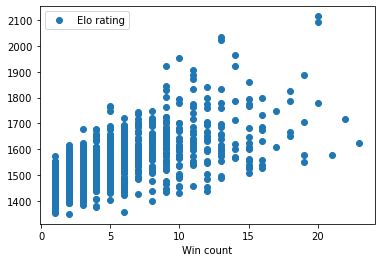

In [30]:
plot_df = most_wins.merge(fdets_copy, left_index=True, right_on='fighter_name')
plot_df.plot(x='Win count', y='Elo rating', style='o')

## 6. Zaključak <a name="zakljucak"></a>

<i> Elo rating </i> jako je koristan sustav od velike povijesne važnosti. Njegova velika prednost leži u jednostavnosti izračunavanja i malom broju parametara. <br>
Zbog te jednostavnosti nije ga teško primjeniti i na druge sportove. <br>
Danas se ovaj sustav uvelike koristi, ali pojavljuju se i neki novi sustavi, na primjer <i> Glicko </i> sustav. <br>
Međutim neke nezaobilazne mane za konkretno ovaj sport su te što je jako teško mjeriti veličinu nekog borca na ovaj način.<br> Uzorak borbi je premal te je nerijetka pojava da borci u starosti upropaste svoj omjer pobjeda i poraza (neki fanovi bi primjetili izostanak Andersona Silve sa svih gore navedenih listi). <br>
Veliki uspjeh ovog sustava je ipak bio što je istaknuo veliki broj boraca koji su smatrani najvećim svih vremena u <i> UFC-u </i>.

## 7. Literatura <a name="literatura"></a>

1. https://en.wikipedia.org/wiki/Elo_rating_system, (Ožujak 2021.)
2. https://realpython.com/python-web-scraping-practical-introduction/ (Travanj 2021.)
3. https://realpython.com/beautiful-soup-web-scraper-python/ (Travanj 2021.)
4. https://en.wikipedia.org/wiki/Chess_rating_system#Elo_rating_system (Travanj 2021.)
5. https://en.wikipedia.org/wiki/Ultimate_Fighting_Championship (Travanj 2021.)